# Introducción

En el paso 4 de este proyecto se realizará un análisis exploratorio de los datos de dos bases de datos para obtener las compañías de transporte más populares y los destinos más solicitados.

Finalmente, en el paso 5 se hará un test de hipótesis para determinar si la media de la duración de los viajes difieren si los días son lluviosos o no. 

# Tabla de contenido
## Análisis exploratorio de datos
## Test de hipótesis
## Conclusión

In [5]:
#importación de paquetes
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from typing import List
from scipy.stats import t
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# 1. Análisis exploratorio de datos

In [6]:
#leyendo el dataframe
try: 
    company_df = pd.read_csv("/datasets/moved_project_sql_result_01.csv")
except:
    company_df = pd.read_csv("moved_project_sql_result_01.csv")

company_df

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [7]:
#obteniendo información de las columnas del df
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
#comprobando si hay datos duplicados
company_df.duplicated().unique()

array([False])

In [9]:
#obteniendo medidas aritméticas
company_df["trips_amount"].describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

In [10]:
#leyendo el dataframe
try: 
    location_df = pd.read_csv("/datasets/moved_project_sql_result_04.csv")
except:
    location_df = pd.read_csv("moved_project_sql_result_04.csv")

location_df

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [11]:
#obteniendo información sobre las columnas del df
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [12]:
#comprobando si hay datos duplicados
location_df.duplicated().unique()

array([False])

No hay valores ausentes en ninguna de las dos tablas y los tipos de datos son correctos. Además, ninguna tiene valores duplicados.

In [13]:
#identificando los barrios más populares en términos de finalización de recorrido
location_df.sort_values(by="average_trips", ascending = False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<AxesSubplot:xlabel='company_name'>

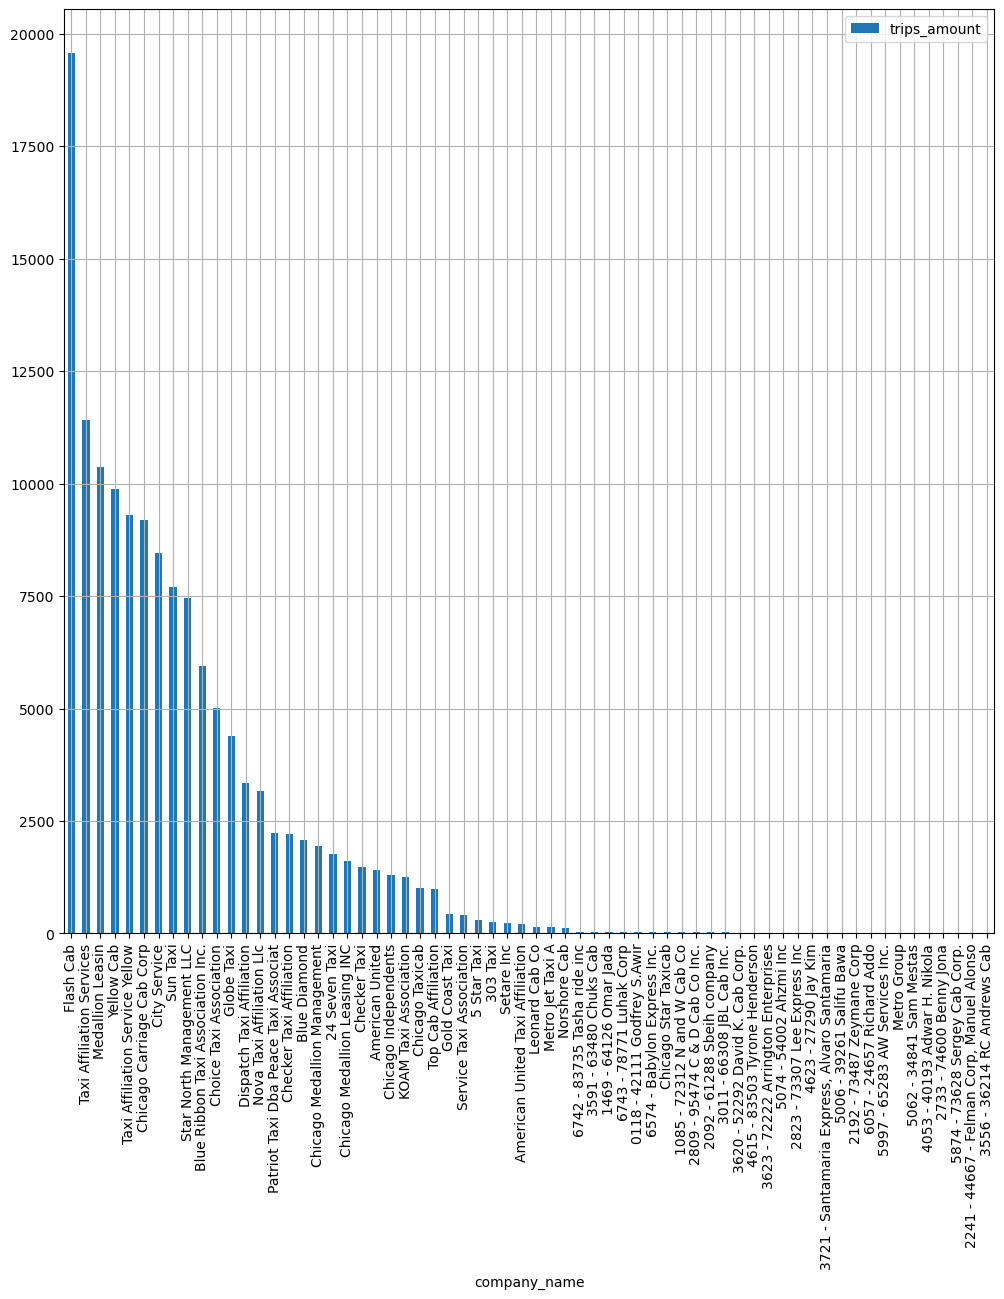

In [14]:
#graficando las empresas de taxis en orden de popularidad
company_df.plot(x="company_name", y="trips_amount", grid=True, figsize=(12,12), kind="bar")

Son muchas empresas que tienen muy pocos viajes en dos días, ya que deben eser pequeñas empresas comparadas con empresas mucho más grandes, por lo que se tomarán en cuenta los más populares.

<AxesSubplot:xlabel='company_name'>

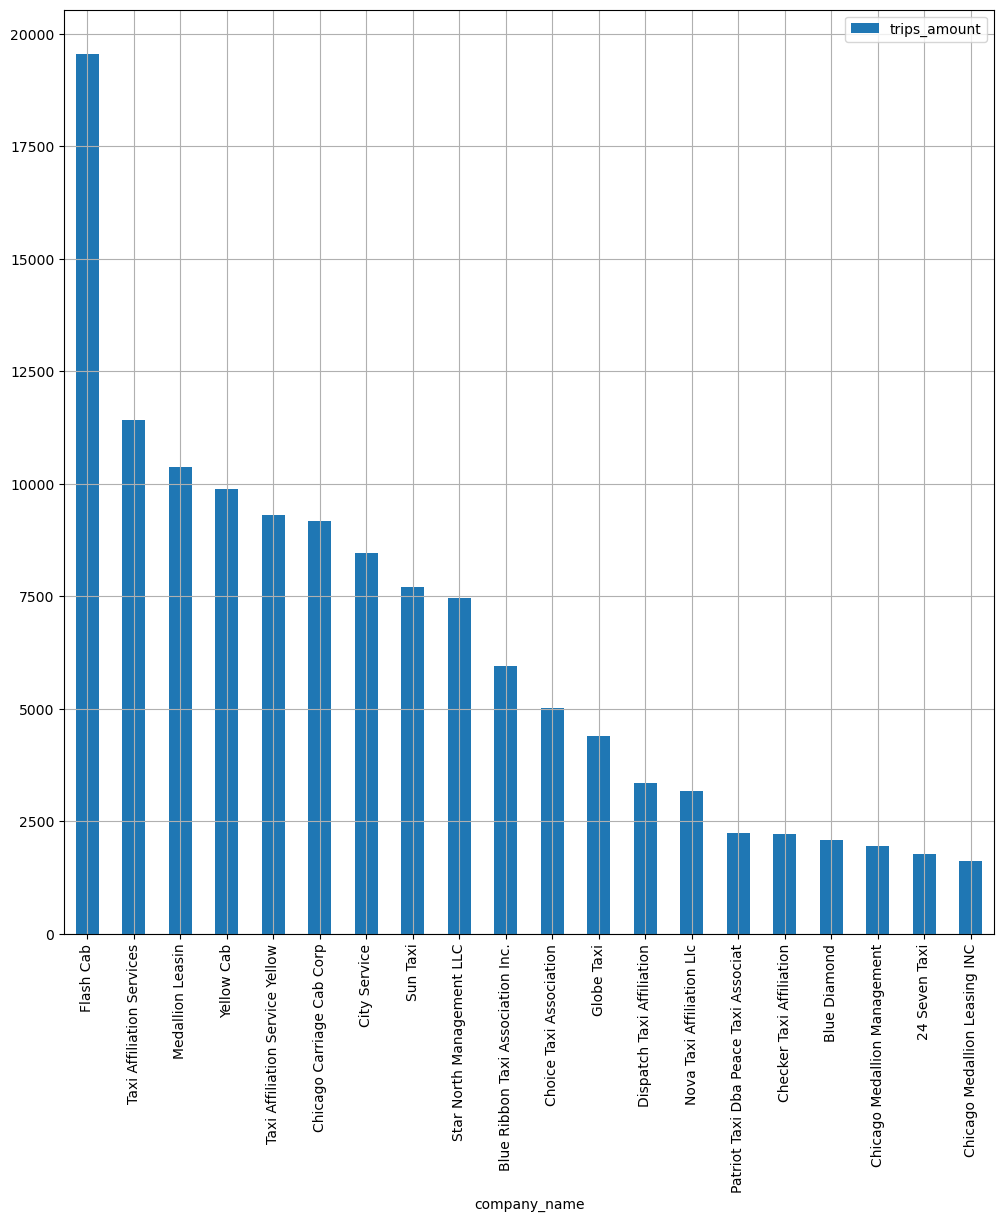

In [15]:
#graficándo las 20 empresas más populares para esos dos días
top_company_df = company_df.sort_values(by='trips_amount', ascending=False).head(20)
top_company_df.plot(x="company_name", y="trips_amount", grid=True, figsize=(12,12), kind="bar")

La compañía más popular tiene casi el doble de viajes que la segunda más popular. Hay mucha diferencia de demanda en la competencia. Las más populares son Flash Cab, Taxi Affiliation Services y Medallion Leasing.

<AxesSubplot:xlabel='dropoff_location_name'>

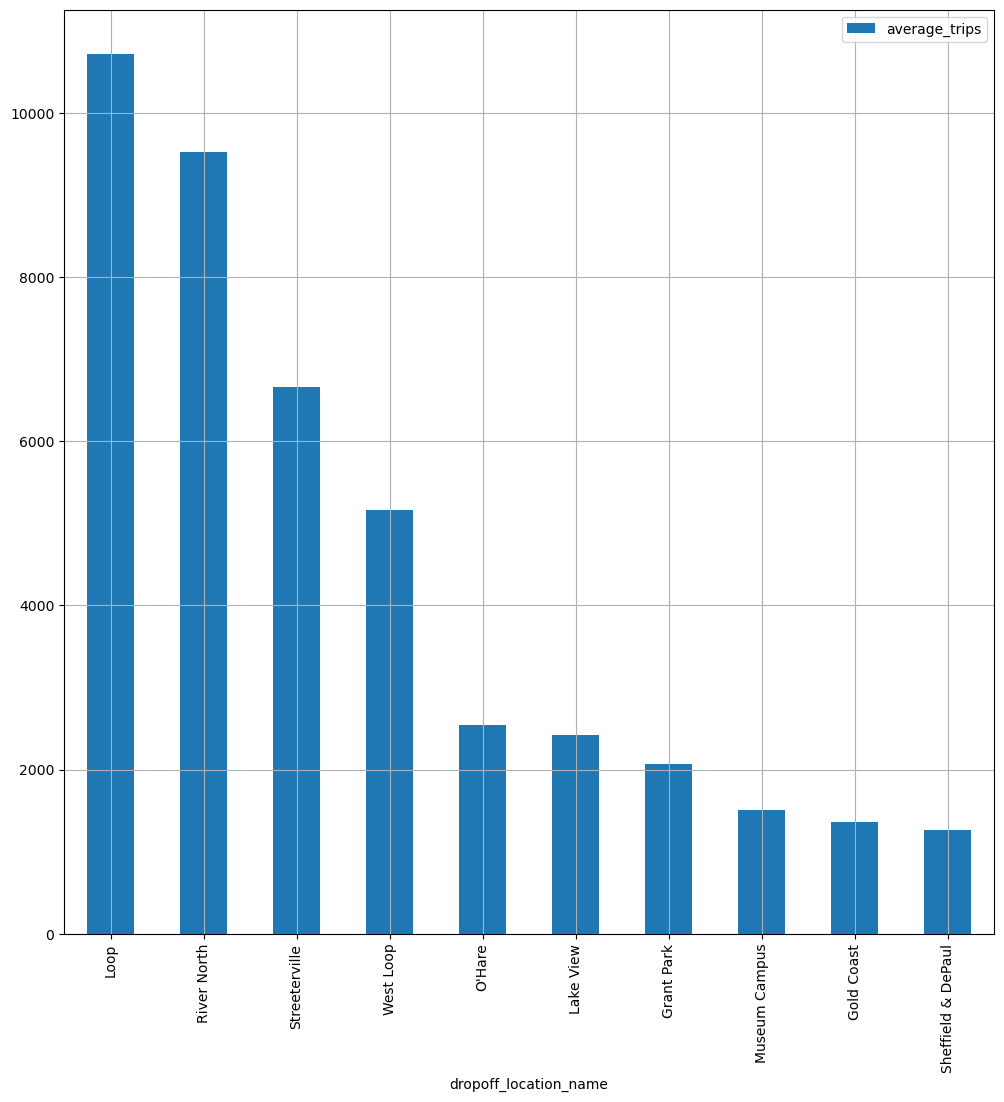

In [16]:
#graficando los 10 destinos más populares
top_location_df = location_df.sort_values(by="average_trips", ascending = False).head(10)
top_location_df.plot(x="dropoff_location_name", y="average_trips", grid=True, figsize=(12,12), kind="bar")

Los barrios "Loop", "River North", "Streeterville" y "West Loop" son los más concurridos como destino final

# 2. Prueba de hipótesis

In [17]:
#leyendo el dataset
try: 
    trips_df = pd.read_csv("/datasets/moved_project_sql_result_07.csv")
except:
    trips_df = pd.read_csv("moved_project_sql_result_07.csv")

In [18]:
#obteniendo información sobre las columnas
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [19]:
#cambiando el tipo de dato de "start_ts"
trips_df["start_ts"] = pd.to_datetime(trips_df["start_ts"], format = "%Y-%m-%d %H:%M:%S")

In [20]:
#obteniendo la información de las columnas del df
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


H0: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos"

H1: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

In [21]:
#verificando que días hay en los datos
trips_df["day"] = trips_df["start_ts"].dt.weekday
trips_df["day"].unique()

array([5], dtype=int64)

Todos los datos corresponden al día sábado, por lo que se hará un df de días buenos y otro de días malos

In [22]:
#separaremos el data frame en los datos con sábados lluviosos y los demás días
good_days = trips_df.query('weather_conditions == "Good"')
bad_days = trips_df.query('weather_conditions == "Bad"')
good_days

,start_ts,weather_conditions,duration_seconds,day
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0,5
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5


Asumiendo que "duration_seconds" distribuye de forma normal, procedemos a graficar el estadístico basado en la distribución normal, es decir la t de student.

In [23]:
def t_density(
    x: List[float],
    trips_df: int=1,
) -> List[float]:
    
    t_pdfs = []
    
    for x_eval in x:
        pdf = t.pdf(x_eval, trips_df)
        
        t_pdfs.append(pdf)
    
    return t_pdfs

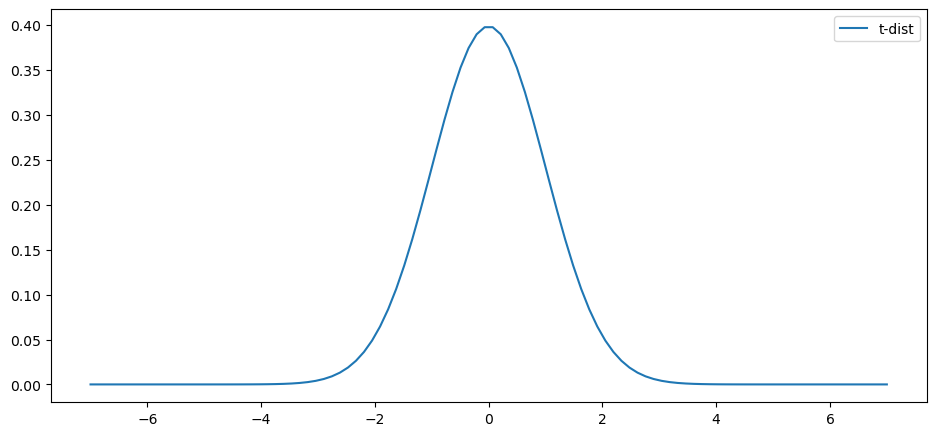

In [24]:
x_duration = np.linspace(-7,7,100)

#calculando los grados de libertad
n = len(trips_df.loc[trips_df["weather_conditions"] == "Good", "duration_seconds"])
m = len(trips_df.loc[trips_df["weather_conditions"] == "Bad", "duration_seconds"])
df_est = n + m - 2

#graficando el estadístico t
pdf_duration = t_density(x_duration, df_est)

fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(x=x_duration, y=pdf_duration, ax=ax, label="t-dist")

fig.tight_layout(pad=3.0)

Ahora se calcula el estadístico y el p_value, realizando el test de hipótesis para la duración cuando el día es bueno y cuando es malo.

In [25]:
#calculando el estadístico de la hipótesis y p_value
t_stat, p_value = ttest_ind(
    trips_df.loc[trips_df["weather_conditions"] == "Good", "duration_seconds"],
    trips_df.loc[trips_df["weather_conditions"] == "Bad", "duration_seconds"]
)

print(t_stat, p_value)

-6.946177714041499 6.517970327099473e-12


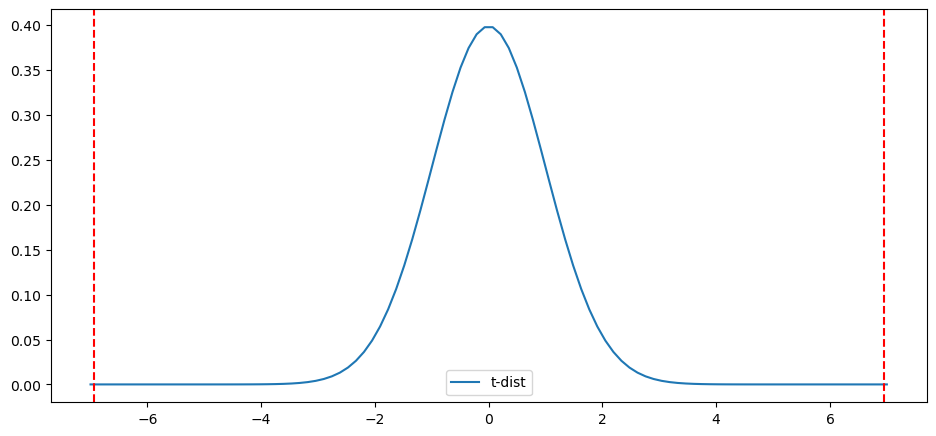

In [26]:
#graficando donde está el estadístico
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=x_duration, y=pdf_duration, ax=ax, label="t-dist")
ax.axvline(x=t_stat, color="red", ls="--")
ax.axvline(x=-t_stat, color="red", ls="--")
fig.tight_layout(pad=3.0)

**Conclusión del test de hipótesis**

Con un nivel de significancia de 0.01, al observar que el p_value es mucho menor a este, rechazamos la hipótesis nula, por lo que es probable que la hipótesis alternativa sea real, es decir, que es probable que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

# 3. Conclusión final

## Análisis 

En este paso se trabajaron dos bases de datos para obtener los barrios más solicitados como destino final y las compañías de taxis más populares.

Para lograr esto se verificó que no hubiese datos repetidos o ausentes y que los tipos de datos estuvieran correctos. Luego se realizaron los gráficos correspondientes.

Compañías más populares: Flash Cab, Taxi Affiliation Services y Medallion Leasing, siendo Flash Cab la que tiene casi el doble de demanda que las otras dos.

Barrios más populares: "Loop", "River North", "Streeterville" y "West Loop".


## Paso 5

Se trabajó la base de datos de viajes para realizar un buen test de hipótesis donde la hipótesis nula era "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos". Tras calcular el t estadístico y el p-value, esta se rechazó por lo que es probable que la duración promedio si cambie en los sábados lluviosos.